In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as model_selection
import tensorflow.keras.callbacks as callbacks
import tensorflow.keras.optimizers as optimizers

In [ ]:
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, TensorBoard, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss_metrics(history, metrics, validation_metrics=True, all_in_one=False, figsize=(10, 6)):
    '''
    Plots loss and metric curves from the history object

    Args:
        history: Tensorflow History object.\n
        metrics: Metrics to plot curves for other than loss.\n
        validation_metrics: {default: True} If False, will not plot metrics for validation data.\n
        all_in_one: {default: False} If True, will plot all curves on a single figure.\n
        figsize: A tuple holding the figure size to plot on.
    '''

    history_df = pd.DataFrame(history.history)
    epochs = range(len(history_df))

    plt.figure(figsize=figsize)
    history_df['loss'].plot(x=epochs)
    if validation_metrics:
        history_df['val_loss'].plot(x=epochs)
    plt.title('Loss Curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

    for metric in metrics:
        if not all_in_one:
            plt.figure(figsize=figsize)
        history_df[metric].plot(x=epochs)
        if validation_metrics:
            history_df['val_' + metric].plot(x=epochs)
        plt.title(metric[0].upper() + metric[1:] + ' Curve')
        plt.ylabel(metric)
        plt.xlabel('epochs')
        plt.legend()

In [ ]:
positive = pd.read_csv('/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_COVID/CT_COVID.csv')
negative = pd.read_csv('/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/CT_NonCOVID.csv')

In [ ]:
positive.head()

,Image
0,2020.01.24.919183-p27-132.png
1,2020.01.24.919183-p27-133.png
2,2020.01.24.919183-p27-134.png
3,2020.01.24.919183-p27-135.png
4,2020.02.10.20021584-p6-52%0.png


In [ ]:
print(positive.describe())
print(negative.describe())

                                Image
count                             251
unique                            251
top     2020.01.24.919183-p27-132.png
freq                                1
         Image
count      292
unique     292
top     14.png
freq         1


In [ ]:
positive_fname = ['/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_COVID/' + fnames for fnames in positive['Image']]
negative_fname = ['/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/' + fnames for fnames in negative['Image']]

negative_fname[1::30]

['/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/15.png',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/576.png',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/1101.png',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/1702.png',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/37%0.jpg',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/49%0.jpg',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/65%1.jpg',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/81%2.jpg',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/486.png',
 '/content/drive/MyDrive/Covid-19 CT-Scan Model/Data/CT_NonCOVID/26%0.jpg']

In [ ]:
img_dict = {'Image' : positive_fname}
positive_1 = pd.DataFrame(img_dict)
positive_1.head()

,Image
0,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
1,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
2,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
3,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
4,/content/drive/MyDrive/Covid-19 CT-Scan Model/...


In [ ]:
positive_1['Labels'] = 1
positive_1.head()

,Image,Labels
0,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
1,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
3,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
4,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1


In [ ]:
img_dict_1 = {'Image' : negative_fname}
negative_1 = pd.DataFrame(img_dict_1)
negative_1.head()

,Image
0,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
1,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
2,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
3,/content/drive/MyDrive/Covid-19 CT-Scan Model/...
4,/content/drive/MyDrive/Covid-19 CT-Scan Model/...


In [ ]:
negative_1['Labels'] = 0
negative_1.tail()

,Image,Labels
287,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
288,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
289,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
290,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
291,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0


In [ ]:
datapath = pd.concat([positive_1, negative_1], ignore_index=True)
datapath

,Image,Labels
0,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
1,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
2,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
3,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
4,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
...,...,...
538,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
539,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
540,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
541,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0


In [ ]:
np.random.seed(42)
datapath = pd.DataFrame.sample(datapath,
                               n=543,
                               ignore_index=True)
datapath

,Image,Labels
0,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
1,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
2,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
3,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
4,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
...,...,...
538,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
539,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,1
540,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0
541,/content/drive/MyDrive/Covid-19 CT-Scan Model/...,0


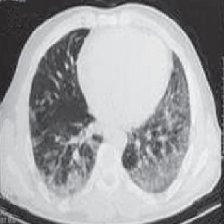

In [ ]:
# Testing....
image = tf.keras.preprocessing.image.load_img(datapath.loc[0].at['Image'],
                                         color_mode='rgb',
                                         target_size=(224, 224))
image

In [ ]:
image_data = []
image_label = []

for index, rows in datapath.iterrows():
 # print(datapath.loc[index].at['Image'],datapath.loc[index].at['Labels'] )
 image = tf.keras.preprocessing.image.load_img(datapath.loc[index].at['Image'],
                                               color_mode='rgb',
                                               target_size=(224, 224))
 image = np.array(image)
 image_data.append(image)
 image_label.append(datapath.loc[index].at['Labels'])

In [ ]:
print(len(image_data))
print(len(image_label))

543
543


In [ ]:
train_data = np.array(image_data[:380]) # 80 percent
val_data = np.array(image_data[380:488]) # 20 percent
test_data = np.array(image_data[488:543]) # 10 percent

train_labels = image_label[:380]
val_labels = image_label[380:488]
test_labels = image_label[488:543]

In [ ]:
len(train_labels) + len(val_labels) + len(test_labels)

543

In [ ]:
# normalize the data
X_train = train_data.astype('float32') / 225
X_val = val_data.astype('float32') / 225
X_test = test_data.astype('float32') / 225

In [ ]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(380, 224, 224, 3)
(108, 224, 224, 3)
(55, 224, 224, 3)


In [ ]:
y_train = train_labels
y_val = val_labels
y_test = test_labels # used against predictions

In [ ]:
y_train = tf.one_hot(y_train, depth = 2)
y_val = tf.one_hot(y_val, depth = 2)
y_test = tf.one_hot(y_test, depth = 2)

In [ ]:
np.shape(y_train), np.shape(y_val), np.shape(y_test)

(TensorShape([380, 2]), TensorShape([108, 2]), TensorShape([55, 2]))

## Model Implementation
* `VGG16` pretrained on Imagenet

In [ ]:
model = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(224, 224, 3))
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
for layer in model.layers[:15]:
  layer.trainable = False

for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
# Creating our model head 
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(2, activation='sigmoid')(x)
transfer_model = tf.keras.Model(inputs=model.input, outputs=x)

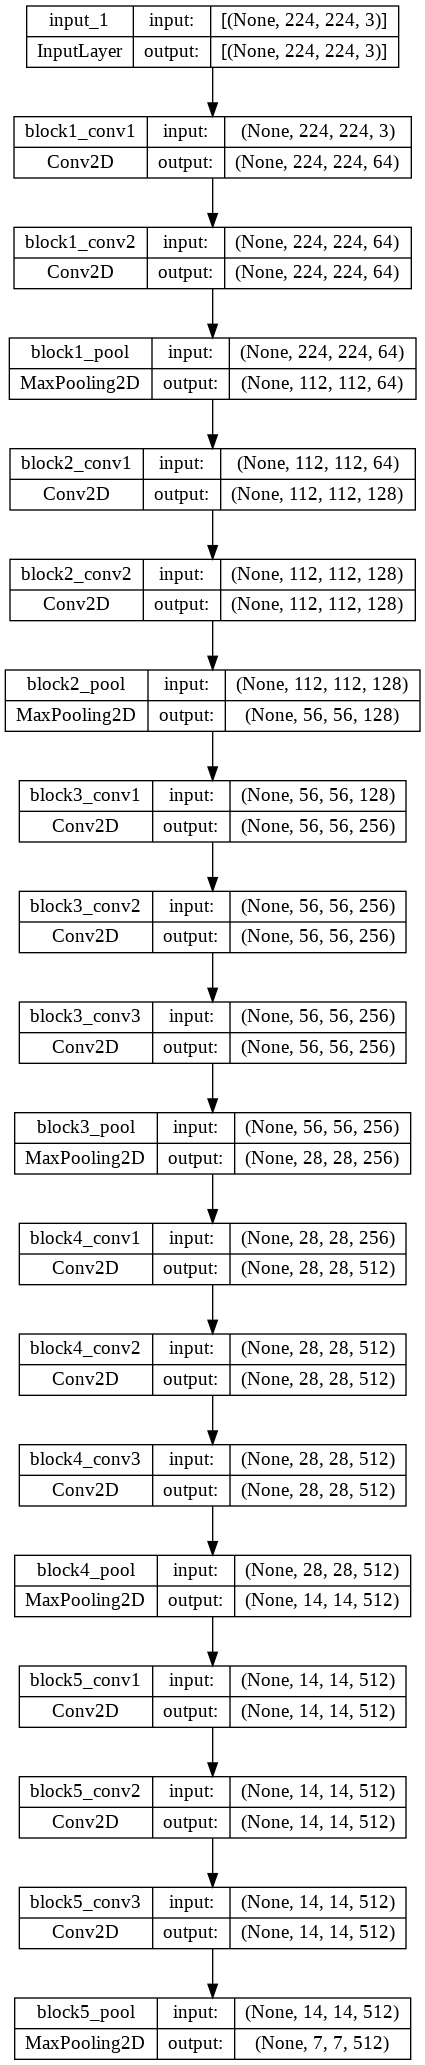

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# defining callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6,
                              patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints/vgg16_finetune.h15', 
                             monitor='val_accuracy',
                             mode='max', save_best_only=True, verbose=1)
earlystopping_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, 
                                      restore_best_weights=True)
earlystopping_val_loss = EarlyStopping(monitor='val_loss', patience=5, 
                                       restore_best_weights=True)

In [ ]:
learning_rate = 5e-5
transfer_model.compile(loss='binary_crossentropy',
                       optimizer= optimizers.Adam(lr=learning_rate),
                       metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = transfer_model.fit(X_train, y_train,
                             batch_size=3,
                             epochs=30,
                             initial_epoch=0,
                             shuffle=True,
                             validation_data=(X_val, y_val),
                             callbacks=[earlystopping_val_acc,
                                        earlystopping_val_loss,
                                        checkpoint])


Epoch 1/30
127/127 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.6237
Epoch 1: val_accuracy improved from -inf to 0.80556, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints/vgg16_finetune.h15


127/127 [==============================] - 19s 76ms/step - loss: 0.6543 - accuracy: 0.6237 - val_loss: 0.4333 - val_accuracy: 0.8056
Epoch 2/30
127/127 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7816
Epoch 2: val_accuracy improved from 0.80556 to 0.87037, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints/vgg16_finetune.h15


127/127 [==============================] - 9s 73ms/step - loss: 0.5102 - accuracy: 0.7816 - val_loss: 0.3026 - val_accuracy: 0.8704
Epoch 3/30
127/127 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.8763
Epoch 3: val_accuracy improved from 0.87037 to 0.91667, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints/vgg16_finetune.h15


127/127 [==============================] - 10s 80ms/step - loss: 0.3103 - accuracy: 0.8763 - val_loss: 0.2271 - val_accuracy: 0.9167
Epoch 4/30
127/127 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9105
Epoch 4: val_accuracy did not improve from 0.91667
127/127 [==============================] - 6s 47ms/step - loss: 0.2124 - accuracy: 0.9105 - val_loss: 0.2241 - val_accuracy: 0.9074
Epoch 5/30
127/127 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9711
Epoch 5: val_accuracy improved from 0.91667 to 0.96296, saving model to /content/drive/MyDrive/Covid-19 CT-Scan Model/Model checkpoints/vgg16_finetune.h15


127/127 [==============================] - 9s 69ms/step - loss: 0.0708 - accuracy: 0.9711 - val_loss: 0.2181 - val_accuracy: 0.9630
Epoch 6/30
127/127 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 6: val_accuracy did not improve from 0.96296
127/127 [==============================] - 5s 41ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9259
Epoch 7/30
127/127 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9816
Epoch 7: val_accuracy did not improve from 0.96296
127/127 [==============================] - 6s 45ms/step - loss: 0.0475 - accuracy: 0.9816 - val_loss: 0.4044 - val_accuracy: 0.9352
Epoch 8/30
127/127 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9895
Epoch 8: val_accuracy did not improve from 0.96296
127/127 [==============================] - 6s 46ms/step - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.4098 - val_accuracy: 0.9259


In [ ]:
transfer_model.evaluate(X_test, y_test, batch_size=3)

19/19 [==============================] - 1s 58ms/step - loss: 0.3828 - accuracy: 0.8909


[0.3828081786632538, 0.8909090757369995]

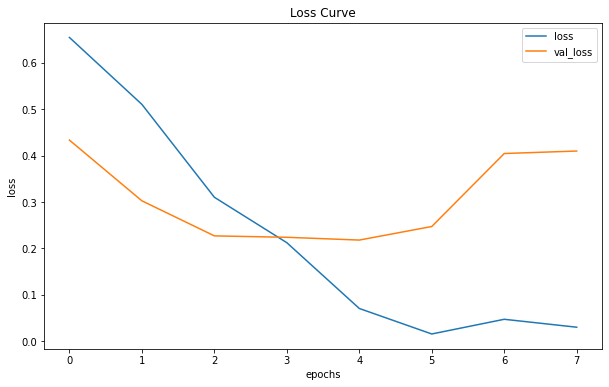

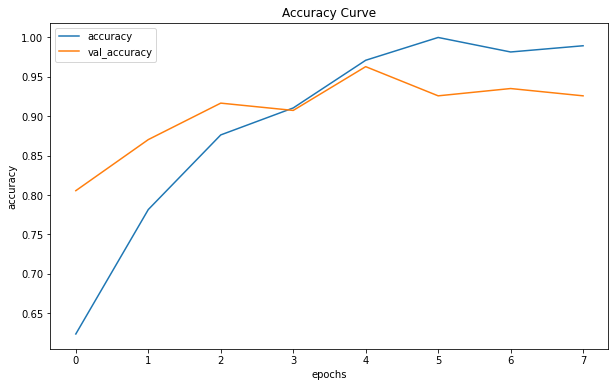

In [ ]:
plot_loss_metrics(history, metrics=['accuracy'])